In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Лінійна регресія

a = 6.844251939795428
b = 3.036378015104317


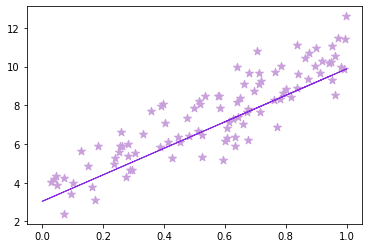

In [84]:
# Генерація точок
m = 100000
a = 7
b = 3.4
noise = np.random.normal(0,1,m)
x = np.random.sample(m)
y = a*x + b + noise

plt.scatter(x[0:100], y[0:100], marker = '*', color = '#C9A0DC', s = 70)

# Градієнтний спуск
a = 0
b = 0
s = 0.1

for i in range(m-1):
    k = a*x[i] + b
    d = k - y[i] 
    a = a - s*d*x[i]
    b = b - s*d

# Параметри лінійної регресії  
print('a =', a)
print('b =', b)

y = a*x + b
plt.plot(x, y, linestyle = '-', linewidth = 1, color = '#8A2BE2')

Логістична регресія

Точність : 0.985


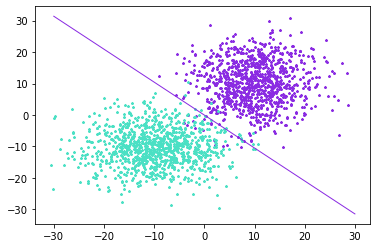

In [11]:
# Генерація точок
m = 1000

p1 = [[np.random.normal(0, 6) + 10, np.random.normal(0, 7) + 10] for i in range(m)]
p2 = [[np.random.normal(0, 7) - 10, np.random.normal(0, 6) - 10] for i in range(m)]

plt.scatter(np.transpose(p1)[0], np.transpose(p1)[1], s=5, marker='*', color='#8A2BE2')
plt.scatter(np.transpose(p2)[0], np.transpose(p2)[1], s=5, marker='*', color='#4BE0C4')

# Параметр швидкості навчання логістичної регресії
s = 0.1

# Сігмоїда
def sigmoid(tetta):
    return 1. / (1. + np.exp(-tetta))
# Навчаємо на трейн вибірці
def train(features, labels):
    # Додаємо стовпець одиниць
    features_matrix = np.c_[features, np.ones(features.shape[0])]
    # Ініціалізуємо ваги довільним чином
    weights = np.random.rand(features_matrix.shape[1])
    
    for i in range(n):
        # Обраховуємо вектор передбачень
        tetta = np.dot(features_matrix, weights)
        # Перераховуємо ваги
        weights -= s * np.dot(np.transpose(features_matrix), (sigmoid(tetta) - labels)) / n
            
    return weights
# Наше передбачення
def predict(features, weights):
    features_matrix = np.c_[features, np.ones(features.shape[0])] 
    tetta = np.dot(features_matrix, weights)
    return [1 if (hypothesis > 0.5) else 0 for hypothesis in sigmoid(tetta)]

# Створення трейн та тест вибірок
n = int(m * 0.8)

X_train = np.concatenate((p1[:n], p2[:n]), axis=0)
Y_train = np.concatenate((np.array([0]*n), np.array([1]*n)))

X_test = np.concatenate((p1[n:], p2[n:]), axis=0)
Y_test = np.concatenate((np.array([0]*(m - n)), np.array([1]*(m - n))))

weights = train(X_train, Y_train)

print("Точність : " + str(sum(predict(X_test, weights)==Y_test)/float(len(Y_test))))

a = -weights[0]/weights[1]
b = weights[2]

x = np.array([-30, 30])
y = a*x + b

plt.plot(x, y, linestyle = '-', linewidth = 1, color = '#8A2BE2')

Дерево рішень

Глибина : 0   Якщо ознака [0] <= -0.25
Глибина : 1      Тоді, якщо ознака [1] <= 6.16
Глибина : 2         Тоді, якщо ознака [1] <= 4.59
Глибина : 3            Тоді, якщо ознака [1] <= -3.03
Глибина : 4               Тоді, мітка : 1, кількість прикладів : 654
Глибина : 4               Інакше, мітка : 1, кількість прикладів : 81
Глибина : 3            Інакше, якщо ознака [0] <= -1.37
Глибина : 4               Тоді, мітка : 1, кількість прикладів : 5
Глибина : 4               Інакше, мітка : 0, кількість прикладів : 3
Глибина : 2         Інакше, якщо ознака [0] <= -6.96
Глибина : 3            Тоді, мітка : 1, кількість прикладів : 2
Глибина : 3            Інакше, якщо ознака [1] <= 7.56
Глибина : 4               Тоді, мітка : 0, кількість прикладів : 3
Глибина : 4               Інакше, мітка : 0, кількість прикладів : 24
Глибина : 1      Інакше, якщо ознака [1] <= -4.52
Глибина : 2         Тоді, якщо ознака [0] <= 6.62
Глибина : 3            Тоді, якщо ознака [1] <= -6.95
Глибина : 4     

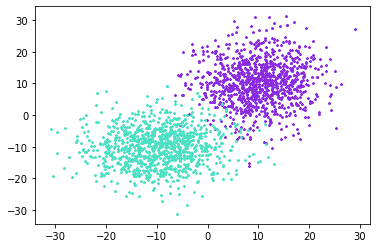

In [41]:
# Генерація точок
m = 1000

p1 = [[np.random.normal(0, 6) + 10, np.random.normal(0, 7) + 10] for i in range(m)]
p2 = [[np.random.normal(0, 7) - 10, np.random.normal(0, 6) - 10] for i in range(m)]

plt.scatter(np.transpose(p1)[0], np.transpose(p1)[1], s=5, marker='*', color='#8A2BE2')
plt.scatter(np.transpose(p2)[0], np.transpose(p2)[1], s=5, marker='*', color='#4BE0C4')

# Створення трейн та тест вибірок
n = int(m * 0.8)

X_train = np.concatenate((p1[:n], p2[:n]), axis=0)
Y_train = np.concatenate((np.array([0]*n), np.array([1]*n)))

X_test = np.concatenate((p1[n:], p2[n:]), axis=0)
Y_test = np.concatenate((np.array([0]*(m - n)), np.array([1]*(m - n))))

# Описання компоненти дерева
class leaf_obj(object):
    # Ініціалізуємо необхідні змінні
    def __init__(self, depth = 0):
        self.feature = None
        self.label = None
        self.root = None
        self.left = None
        self.right = None
        self.amount_of_samples = None       
        self.threshold_value = None
        self.depth = depth
    # Обраховання 'нечистість за Джині', від англ. Gini impurity, 
    # як 1 - сумма квадратів частот(ймовірностей) класів
    def calculate_gini_impurity(self, labels):
        amount = labels.shape[0]
        return 1-sum([(len(labels[labels == label]) / amount)**2 for label in np.unique(labels)])
    
    def grow_leaf(self, features, labels):
        # Збереження кількості прикладів, які дійшли до даного листа
        self.amount_of_samples = features.shape[0]
        # Припиняэмо рекурсію, коли доходимо до моменту,
        # коли усі семпли, які залишились, належать одному класу
        if (len(np.unique(labels)) == 1):
            self.label = labels[0]
            return
        
        # Інітіалізуємо необхідні нам змінні
        best_feature = None
        best_threshold_value = None
        best_impurity_gain = 0
        
        # Пошук мітки, яка найбільше зустрічається
        label_freq = [[label, len(labels[labels == label])] for label in np.unique(labels)]
        self.label = label_freq[np.argmax(np.transpose(label_freq)[1])][0]
        
        for feature in range(features.shape[1]):
            threshold_values = (np.unique(features[:, feature])[: -1] + np.unique(features[:, feature])[1:]) / 2.
            # Знаходження найкращих значеннь
            for threshold_value in threshold_values:
                labels_left = labels[features[:, feature] <= threshold_value]
                labels_right = labels[features[:, feature] > threshold_value]
            
                # Визначення приросту для даної фічі та її порогового значення
                impurity_gain = self.calculate_gini_impurity(labels) -\
                                ((float(labels_left.shape[0]) / self.amount_of_samples) *\
                                     self.calculate_gini_impurity(labels_left) +\
                                 (float(labels_right.shape[0]) / self.amount_of_samples) *\
                                     self.calculate_gini_impurity(labels_right))
                
                if impurity_gain > best_impurity_gain:
                    best_impurity_gain = impurity_gain
                    best_feature = feature
                    best_threshold_value = threshold_value
                    
        # Присвоєння знайденних найкращих значень
        self.feature = best_feature
        self.threshold_value = best_threshold_value
        
        # Спліт на лівий та правий лист відносно знайденого порогу
        self.split_left_right(features, labels)
        
    def split_left_right(self, features, labels):
        # Створення лівої та правої компоненти
        # та запуск росту дерева з обох з них
        indices_left = features[:, self.feature] <= self.threshold_value
        indices_right = features[:, self.feature] > self.threshold_value
        
        features_left = features[indices_left]
        features_right = features[indices_right]
        
        labels_left = labels[indices_left]
        labels_right = labels[indices_right]
        
        self.left = leaf_obj(self.depth + 1)
        self.right = leaf_obj(self.depth + 1)
        
        self.left.grow_leaf(features_left, labels_left)
        self.right.grow_leaf(features_right, labels_right)
        
    def prune_whole_tree(self, max_depth):
        # Критерій зупинки рекурсії
        if self.feature is None:
            return
        # Запуск обрізання дерева для дочірніх листів
        self.left.prune_whole_tree(max_depth)
        self.right.prune_whole_tree(max_depth)   
        # Затирання посилання на дочірні листи та фічі,
        # по якій сплітимо, якщо перейшли за межу
        if self.depth >= max_depth:
            self.left = None
            self.right = None
            self.feature = None

    def train(self, train_features, train_labels, max_depth):
        # Створення першого листа
        self.root = leaf_obj()
        # Запуск росту усього дерева
        self.root.grow_leaf(train_features, train_labels)
        # Обрізання зайвих листів
        self.root.prune_whole_tree(max_depth)

    def predict(self, feature_values):
        return np.array([self.root.tree_descent(feature_value) for feature_value in feature_values])

    def tree_descent(self, feature_value):
        # Критерій зупинки рекурсії
        if self.feature is None:
            return self.label
        else:
            # Вибір напряму, по якому далі слід спускатися по дереву
            if feature_value[self.feature] <= self.threshold_value:
                return self.left.tree_descent(feature_value)
            else:
                return self.right.tree_descent(feature_value)

    def draw_whole_tree(self, prefix = ""):
        line_start = "Глибина : " + str(self.depth) + "   " * (self.depth+1) + prefix
        if self.feature != None:
            line_middle = ("Я" if (self.depth == 0) else "я") + "кщо ознака [" + str(self.feature) + "] <= "
            line_end = str("{:.2f}".format(self.threshold_value))
            print(line_start + line_middle + line_end)
            self.left.draw_whole_tree("Тоді, ")
            self.right.draw_whole_tree("Інакше, ")
        else:
            print(line_start + "мітка : " + str(self.label) + ", кількість прикладів : " + str(self.amount_of_samples))
            
Tree = leaf_obj()
Tree.train(X_train, Y_train, 4)
Tree.root.draw_whole_tree()

prediction = Tree.predict(X_test)
print('Точність : ', np.mean(prediction == Y_test))